In [92]:
"""Count: GPT-3.5 joint accuracy."""
import os
size = 65
# result_folder = "results_65/prompt_ToMh"
# result_folder = 'API_responses'
result_folder = 'result_gpt-3.5-turbo-v0'
ans_folder = "data_ToMh_old"
acc = {}

def correct(result, choice, ans):
    if ans in result.lower() or choice in result:
        return 1
    return 0

# Iterate over all files and subdirectories within the root folder
for folder_name, subfolders, filenames in os.walk(result_folder):
    for filename in filenames:
        if filename.endswith(".txt"):
                ans_folder_name = folder_name.replace(result_folder, ans_folder)
                
                with open(os.path.join(ans_folder_name, filename), "r") as f:
                    output = f.read()
                    ans = output[output.find('Answer: '):]
                    ans = ans[:ans.find('\n')]
                    ans = ans.split()[-1]
                    choice = output[output.find('Choices:'):]
                    choice = choice[choice.find(ans)-3]
                    ans = ans.replace('_',' ')

                with open(os.path.join(folder_name, filename), "r") as f:
                    result = f.read()
                    result = result[-60:]
                    result = result.replace('_',' ')
                    choice_exist = result.find(choice)
                    acc_path  = os.path.join(folder_name, filename).replace(result_folder,'')
                    
                acc[acc_path] = correct(result, choice, ans)
print(acc_path)
print(folder_name)
print(filename)
# joint acc
for key, value in acc.items():
    if value == 0:
        index = 2+key.find('r_')
        o = int(key[index]) + 1
        for i in range(o, 5):
            # print('r_'+key[index])
            new_k = key.replace('r_'+key[index], 'r_'+str(i))
            # print(key, new_k)
            acc[new_k] = 0
print(new_k)

/Tell/MC/length_1/sample_15/order_1.txt
result_gpt-3.5-turbo-v0/Tell/MC/length_1/sample_15
order_1.txt
/Tell/MC/length_1/sample_15/order_4.txt


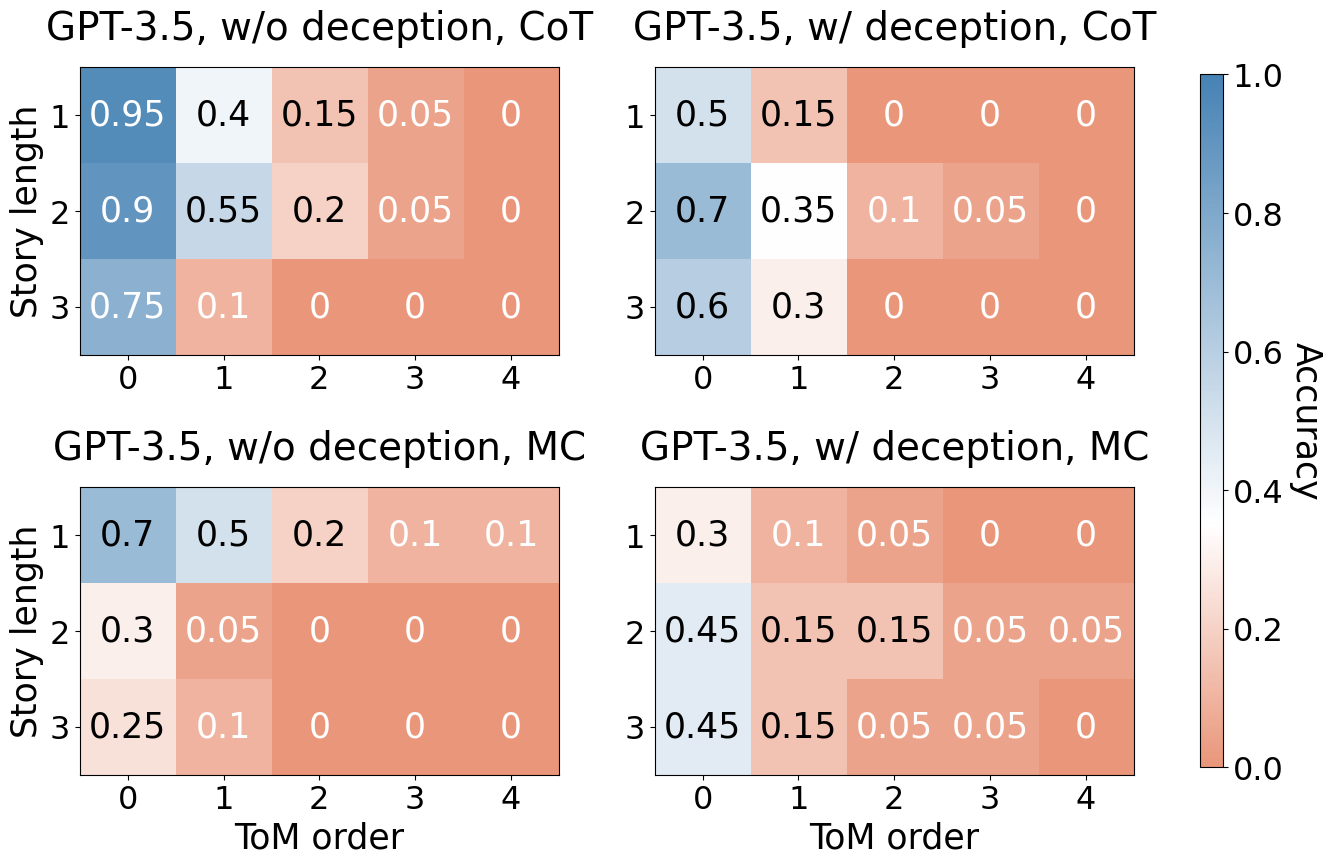

In [83]:
"""Plot: GPT-3.5 joint accuracy heatmap"""
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pprint

tells = ['No_Tell', 'Tell']
prompts = ['CoT', 'MC']
lengths = [1, 2, 3]
orders = [0, 1, 2, 3, 4]

joint_accuracy_data_3 = {'Tell': {'CoT': np.zeros((3, 5)), 'MC': np.zeros((3, 5))},
                'No_Tell': {'CoT': np.zeros((3, 5)), 'MC': np.zeros((3, 5))}}

for tell, prompt, length, order in itertools.product(tells, prompts, lengths, orders):
    joint_acc_value = 0
    for sample_num in range(1, 21):
        acc_path = f'/{tell}/{prompt}/length_{length}/sample_{sample_num}/order_{order}.txt'
        joint_acc_value += acc[acc_path]
        joint_accuracy_data_3[tell][prompt][length-1][order] = joint_acc_value / 20

FONT_SIZE = 25
TICK_SIZE = 23
LEGEND_FONT_SIZE = 22
TITLE_FONT_SIZE = 28

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=42)  # fontsize of the figure title
# plt.rcParams["font.family"] = "Times New Roman"
# colors = [(0, '#c23728'), (0.05, '#e14b31'), (0.1, '#de6e56'), (0.2, '#e1a692'), (0.3, '#e2e2e2'), (0.6, '#a7d5ed'), (0.7, '#63bff0'), (0.8, '#22a7f0'), (1, '#1984c5')]
# colors = [(0, '#a2191f'), (0.13333333333333333, '#da1e28'), (0.2, '#fa4d56'), (0.26666666666666666, '#ff8389'), (0.3333333333333333, '#ffb3b8'), (0.4, '#ffd7d9'), (0.4666666666666667, '#fff1f1'), (0.5333333333333333, '#e5f6ff'), (0.6, '#bae6ff'), (0.6666666666666666, '#82cfff'), (0.7333333333333333, '#33b1ff'), (0.8, '#1192e8'), (0.8666666666666667, '#0072c3'), (0.9333333333333333, '#00539a'), (1.0, '#003a6d')]
# colors = [(0, 'darksalmon'), (0.1, 'darksalmon'), (0.2, 'peachpuff'), (0.25, 'seashell'), (0.35, 'white'), (1, 'steelblue')]
# colors = [(0, 'indianred'), (0.1, 'indianred'), (0.2, 'lightcoral'), (0.3, 'mistyrose'), (0.4, 'white'), (1, 'steelblue')]
# colors = [(0, 'lightcoral'), (0.1, 'lightcoral'), (0.25, 'mistyrose'), (0.35, 'white'), (1, 'steelblue')]
colors = [(0, 'darksalmon'), (0.35, 'white'), (1, 'steelblue')]

blueredcmap = mcolors.LinearSegmentedColormap.from_list(
    "mycmap", 
    colors
)

# for tell, prompt in itertools.product(tells, prompts):
#     fig, ax = plt.subplots(figsize=(8, 5))
#     im = ax.imshow(joint_accuracy_data_3[tell][prompt], cmap=mpl.colormaps['Blues'])
#     # im = ax.imshow(joint_accuracy_data_3[tell][prompt], cmap=cmap) # customize colormap

#     # Show all ticks and label them with the respective list entries
#     ax.set_xticks(np.arange(5), rotation=45)
#     ax.set_yticks(np.arange(3), labels=[1, 2, 3])
#     ax.set_xlabel('ToM order')
#     ax.set_ylabel('Story length')
#     cbar = ax.figure.colorbar(im, ax=ax)
#     cbar.ax.set_ylabel("Accuracy", rotation=-90, va="bottom")
#     communication = 'w/ deception' if tell == 'Tell' else 'w/o deception'
#     ax.set_title(f'{communication}, {prompt} prompting', fontsize=TITLE_FONT_SIZE)

#     # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(),
#             rotation_mode="anchor")

#     # Loop over data dimensions and create text annotations.
#     for i in range(3):
#         for j in range(5):
#             rounded = np.round(joint_accuracy_data_3[tell][prompt], 2)
#             fontcolor = 'black' if joint_accuracy_data_3[tell][prompt][i][j] < 0.7 else 'white'
#             text = ax.text(j, i, rounded[i][j],
#                         ha="center", va="center", color=fontcolor)

#     fig.tight_layout()
#     plt.savefig(f'data_figs/{tell}_{prompt}.pdf')

"""Plot 2 combined heatmaps"""
# Show all ticks and label them with the respective list entries
cmap = blueredcmap
fig, axs = plt.subplots(2, 2, figsize=(17,10))

im1 = axs[0][0].imshow(joint_accuracy_data_3['No_Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im2 = axs[0][1].imshow(joint_accuracy_data_3['Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im3 = axs[1][0].imshow(joint_accuracy_data_3['No_Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
im4 = axs[1][1].imshow(joint_accuracy_data_3['Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
for i, j in itertools.product(range(2), range(2)):
    axs[i][j].set_xticks(np.arange(5), rotation=45)
    axs[i][j].set_yticks(np.arange(3), labels=[1, 2, 3])
    axs[1][j].set_xlabel('ToM order')
    axs[i][0].set_ylabel('Story length')
    communication = 'GPT-3.5, w/ deception, ' if j == 1 else 'GPT-3.5, w/o deception, '
    axs[i][j].set_title(communication+prompts[i], fontsize=TITLE_FONT_SIZE, pad=20)

# Loop over data dimensions and create text annotations.
for t, tell in enumerate(tells):
    for p, prompt in enumerate(prompts):
        rounded = np.round(joint_accuracy_data_3[tell][prompt], 2)
        for i in range(3):
            for j in range(5):
                fontcolor = 'black' if joint_accuracy_data_3[tell][prompt][i][j] < 0.75 and joint_accuracy_data_3[tell][prompt][i][j] > 0.1 else 'white'
                value = rounded[i][j] if rounded[i][j] != 0 else 0
                text = axs[p][t].text(j, i, value,
                            ha="center", va="center", color=fontcolor)

cbar = fig.colorbar(im1, ax=axs.ravel().tolist(), orientation='vertical', shrink=0.9, aspect=30)
cbar.ax.set_ylabel('Accuracy', rotation=-90, va="bottom")

plt.savefig(f'data_figs/CoT_heatmaps_GPT3.5.pdf')

In [93]:
"""Count: GPT-4 joint accuracy."""
import os
import sys
import copy
import itertools
import numpy as np
import pprint

input_folder = 'extracted_response'
answer_folder = 'data_ToMh_old'
response_folder = 'API_responses'
output_folder = 'check_GPT-4'
summary_file = 'GPT-4_data.txt'
lengths = [1, 2, 3]
orders = [0, 1, 2, 3, 4]
prompts = ['CoT', 'MC']
tells = ['No_Tell', 'Tell']
CoT_count, CoT_correct = [0, 0]
MC_count, MC_correct = [0, 0]
summary_lines = []
joint_accuracy_data = {'Tell': {'CoT': np.zeros((3, 5)), 'MC': np.zeros((3, 5))},
                'No_Tell': {'CoT': np.zeros((3, 5)), 'MC': np.zeros((3, 5))}}
joint_cnt_vs_deception = np.zeros((5, 7))
joint_correct_vs_deception = np.zeros((5, 7))
deception = set()

for tell, prompt, length in itertools.product(tells, prompts, lengths):
    
    total_count = np.zeros(5)
    correct_count = np.zeros(5)

    for sample_num in range(1, 21):
        correct_so_far = True
        for i, order in enumerate(orders):
            input_fn = os.path.join(input_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}',
                                    f'order_{order}.txt')
            response_fn = os.path.join(response_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}',
                                    f'order_{order}.txt')
            answer_fn = os.path.join(answer_folder, tell, 'CoT', f'length_{length}', f'sample_{sample_num}',
                                        f'order_{order}.txt')
            output_fn = os.path.join(output_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}',
                                        f'order_{order}.txt')
            count_deception = 0
            with open(answer_fn, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    if 'Answer:' in line.split(' '):
                        correct_answer = line.split(' ', 1)[1].split('\n')[0]
                    if 'privately' in line.split(' '):
                        count_deception += 1
                    if 'publicly' in line.split(' '):
                        count_deception += 2
            
            joint_cnt_vs_deception[order][count_deception] += 1
            
            with open(input_fn, 'r') as file:
                lines = file.readlines()
                if len(lines[0].split(' ')) == 2:
                    answer_line = lines[0].split(' ')[1]
                else:
                    # print(f"Eliminated: {tell}, {prompt}, {length} chapters, {order} order, " , lines)
                    continue
            
            total_count[i] += 1
            if answer_line == correct_answer and correct_so_far:
                correct_count[i] += 1
                joint_correct_vs_deception[order][count_deception] += 1
            elif answer_line != correct_answer:
                correct_so_far = False
    for order in orders:
        joint_accuracy_data[tell][prompt][length - 1][order] = correct_count[order] / total_count[order]
# print(deception)
pprint.pprint(joint_accuracy_data)
# pprint.pprint(joint_cnt_vs_deception)
# pprint.pprint(joint_correct_vs_deception)

{'No_Tell': {'CoT': array([[1.        , 0.84210526, 0.7       , 0.45      , 0.35      ],
       [0.95      , 0.78947368, 0.5       , 0.2       , 0.1       ],
       [0.95      , 0.55      , 0.2       , 0.15789474, 0.15      ]]),
             'MC': array([[1.        , 0.7       , 0.5       , 0.45      , 0.4       ],
       [0.95      , 0.75      , 0.35      , 0.1       , 0.05      ],
       [0.93333333, 0.57894737, 0.2       , 0.15      , 0.15      ]])},
 'Tell': {'CoT': array([[1.        , 0.65      , 0.3       , 0.2       , 0.15      ],
       [1.        , 0.55      , 0.2       , 0.1       , 0.1       ],
       [1.        , 0.45      , 0.3       , 0.1       , 0.05263158]]),
          'MC': array([[1.        , 0.6       , 0.2       , 0.1       , 0.1       ],
       [1.        , 0.6       , 0.35      , 0.15      , 0.15      ],
       [0.95      , 0.4       , 0.21052632, 0.05      , 0.05      ]])}}


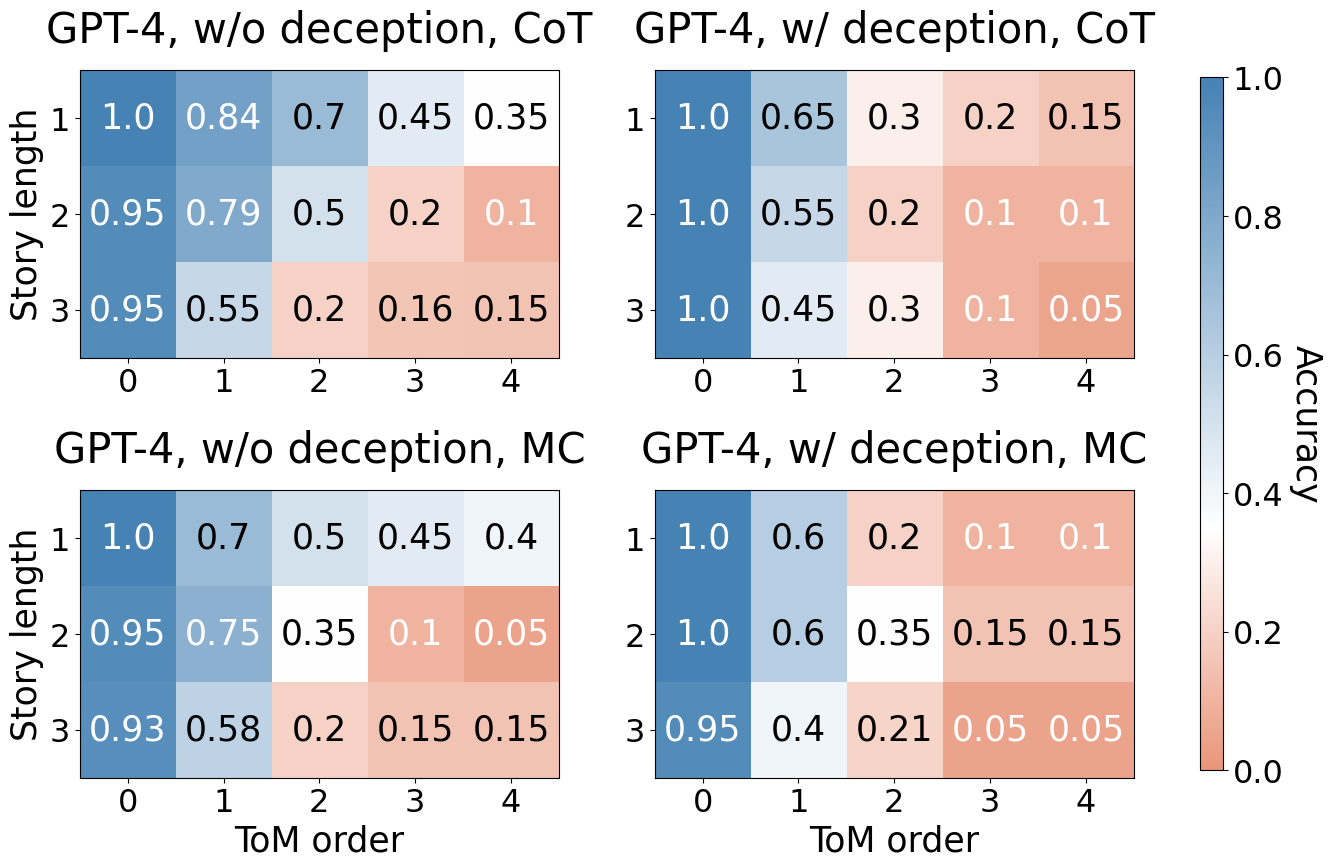

In [91]:
"""Plot: GPT-4 joint accuracy heatmap"""
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

FONT_SIZE = 25
TICK_SIZE = 23
LEGEND_FONT_SIZE = 22
TITLE_FONT_SIZE = 30

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=42)  # fontsize of the figure title
# plt.rcParams["font.family"] = "Times New Roman"
# colors = [(0, 'darksalmon'), (0.1, 'peachpuff'), (0.2, 'seashell'), (0.25, 'white'), (1, 'steelblue')]
# colors = [(0, 'darksalmon'), (0.1, 'darksalmon'), (0.2, 'peachpuff'), (0.25, 'seashell'), (0.35, 'white'), (1, 'steelblue')]
colors = [(0, 'darksalmon'), (0.35, 'white'), (1, 'steelblue')]

blueredcmap = mcolors.LinearSegmentedColormap.from_list(
    "mycmap", 
    colors
)

"""Plot 2 combined heatmaps"""

# Show all ticks and label them with the respective list entries
fig, axs = plt.subplots(2, 2, figsize=(17,10))
cmap = blueredcmap

im1 = axs[0][0].imshow(joint_accuracy_data['No_Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im2 = axs[0][1].imshow(joint_accuracy_data['Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im3 = axs[1][0].imshow(joint_accuracy_data['No_Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
im4 = axs[1][1].imshow(joint_accuracy_data['Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
for i, j in itertools.product(range(2), range(2)):
    axs[i][j].set_xticks(np.arange(5), rotation=45)
    axs[i][j].set_yticks(np.arange(3), labels=[1, 2, 3])
    axs[1][j].set_xlabel('ToM order')
    axs[i][0].set_ylabel('Story length')
    communication = 'GPT-4, w/ deception, ' if j == 1 else 'GPT-4, w/o deception, '
    axs[i][j].set_title(communication+prompts[i], fontsize=TITLE_FONT_SIZE, pad=20)

# Loop over data dimensions and create text annotations.
for t, tell in enumerate(tells):
    for p, prompt in enumerate(prompts):
        rounded = np.round(joint_accuracy_data[tell][prompt], 2)
        for i in range(3):
            for j in range(5):
                fontcolor = 'black' if joint_accuracy_data[tell][prompt][i][j] < 0.75 and joint_accuracy_data[tell][prompt][i][j] > 0.1 else 'white'
                value = rounded[i][j] if rounded[i][j] != 0 else 0
                text = axs[p][t].text(j, i, value,
                            ha="center", va="center", color=fontcolor)

cbar = fig.colorbar(im1, ax=axs.ravel().tolist(), orientation='vertical', shrink=0.9, aspect=30)
cbar.ax.set_ylabel('Accuracy', rotation=-90, va="bottom")

plt.savefig(f'data_figs/CoT_heatmaps_GPT4.pdf')

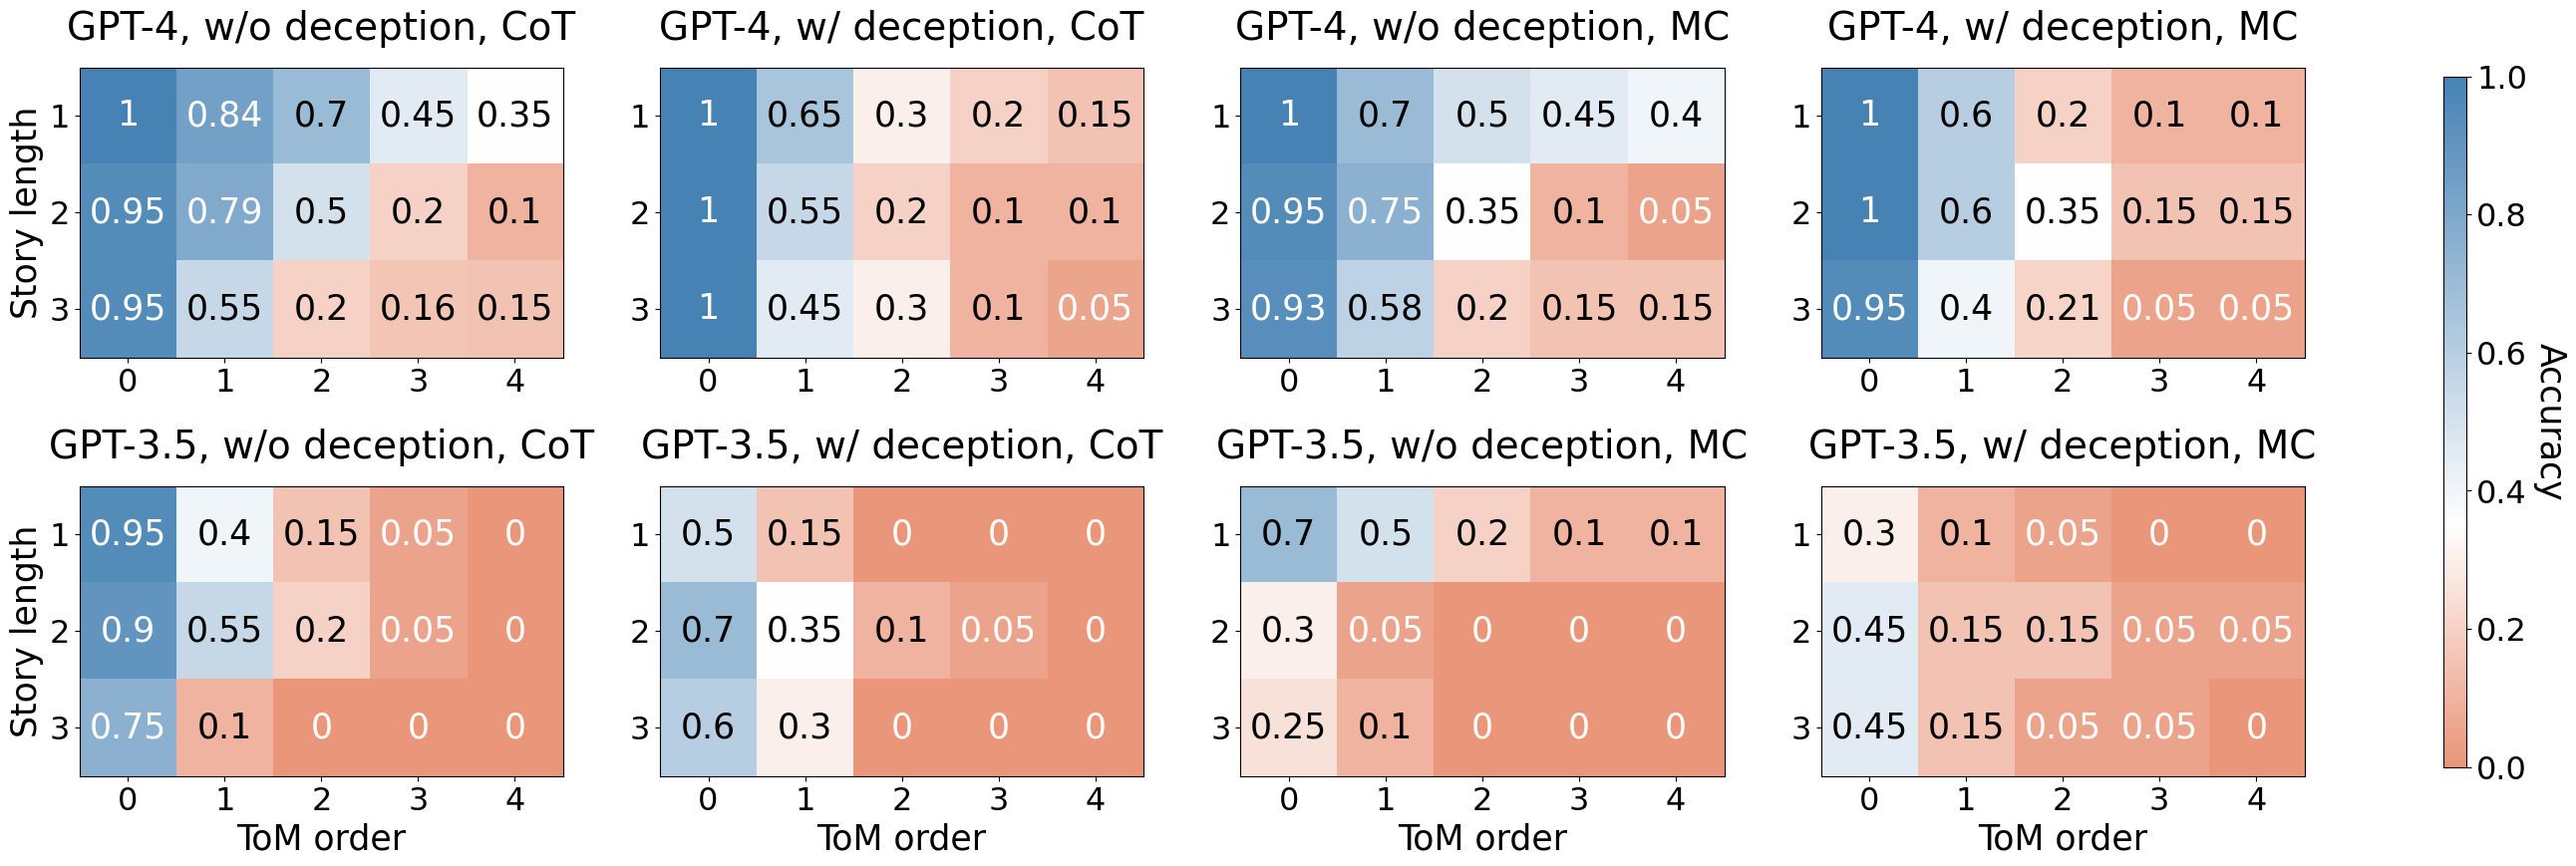

In [104]:
"""Plot: GPT-4 and GPT-3.5 joint accuracy heatmap"""
import numpy as np
import itertools
import matplotlib
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

FONT_SIZE = 25
TICK_SIZE = 23
LEGEND_FONT_SIZE = 22
TITLE_FONT_SIZE = 28

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=42)  # fontsize of the figure title
# plt.rcParams["font.family"] = "Times New Roman"
# colors = [(0, 'darksalmon'), (0.1, 'peachpuff'), (0.2, 'seashell'), (0.25, 'white'), (1, 'steelblue')]
# colors = [(0, 'darksalmon'), (0.1, 'darksalmon'), (0.2, 'peachpuff'), (0.25, 'seashell'), (0.35, 'white'), (1, 'steelblue')]
colors = [(0, 'darksalmon'), (0.35, 'white'), (1, 'steelblue')]

blueredcmap = mcolors.LinearSegmentedColormap.from_list(
    "mycmap", 
    colors
)

"""Plot all combined heatmaps"""
titles = np.array([['GPT-4, w/o deception, CoT', 'GPT-4, w/ deception, CoT', 'GPT-4, w/o deception, MC', 'GPT-4, w/ deception, MC'],
            ['GPT-3.5, w/o deception, CoT', 'GPT-3.5, w/ deception, CoT', 'GPT-3.5, w/o deception, MC', 'GPT-3.5, w/ deception, MC']])

# Show all ticks and label them with the respective list entries
fig, axs = plt.subplots(2, 4, figsize=(36,10))
cmap = blueredcmap

im1 = axs[0][0].imshow(joint_accuracy_data['No_Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im2 = axs[0][1].imshow(joint_accuracy_data['Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im3 = axs[0][2].imshow(joint_accuracy_data['No_Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
im4 = axs[0][3].imshow(joint_accuracy_data['Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
im5 = axs[1][0].imshow(joint_accuracy_data_3['No_Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im6 = axs[1][1].imshow(joint_accuracy_data_3['Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im7 = axs[1][2].imshow(joint_accuracy_data_3['No_Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
im8 = axs[1][3].imshow(joint_accuracy_data_3['Tell']['MC'], cmap=cmap, vmin=0, vmax=1)

for i, j in itertools.product(range(2), range(4)):
    axs[i][j].set_xticks(np.arange(5), rotation=45)
    axs[i][j].set_yticks(np.arange(3), labels=[1, 2, 3])
    axs[1][j].set_xlabel('ToM order')
    axs[i][0].set_ylabel('Story length')
    axs[i][j].set_title(titles[i][j], fontsize=TITLE_FONT_SIZE, pad=20)

# Loop over data dimensions and create text annotations.
black_range = [0.06, 0.75]
for k, (prompt,tell) in enumerate(itertools.product(prompts,tells)):
    rounded = np.round(joint_accuracy_data[tell][prompt], 2)
    for i in range(3):
        for j in range(5):
            fontcolor = 'black' if joint_accuracy_data[tell][prompt][i][j] < black_range[1] and joint_accuracy_data[tell][prompt][i][j] > black_range[0] else 'white'
            value = rounded[i][j] if rounded[i][j] != 0 else 0
            value = value if rounded[i][j] != 1 else 1
            text = axs[0][k].text(j, i, value,
                        ha="center", va="center", color=fontcolor)
for k, (prompt,tell) in enumerate(itertools.product(prompts,tells)):
    rounded = np.round(joint_accuracy_data_3[tell][prompt], 2)
    for i in range(3):
        for j in range(5):
            fontcolor = 'black' if joint_accuracy_data_3[tell][prompt][i][j] < black_range[1] and joint_accuracy_data_3[tell][prompt][i][j] > black_range[0] else 'white'
            value = rounded[i][j] if rounded[i][j] != 0 else 0
            value = value if rounded[i][j] != 1 else 1
            text = axs[1][k].text(j, i, value,
                        ha="center", va="center", color=fontcolor)

cbar = fig.colorbar(im1, ax=axs.ravel().tolist(), orientation='vertical', shrink=0.9, aspect=30)
cbar.ax.set_ylabel('Accuracy', rotation=-90, va="bottom")

plt.savefig(f'data_figs/CoT_heatmaps.pdf')

In [ ]:
"""Plot: GPT-4 and GPT-3.5 accuracy heatmap"""
import numpy as np
import itertools
import matplotlib
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

FONT_SIZE = 25
TICK_SIZE = 23
LEGEND_FONT_SIZE = 22
TITLE_FONT_SIZE = 28

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=42)  # fontsize of the figure title
# plt.rcParams["font.family"] = "Times New Roman"
# colors = [(0, 'darksalmon'), (0.1, 'peachpuff'), (0.2, 'seashell'), (0.25, 'white'), (1, 'steelblue')]
# colors = [(0, 'darksalmon'), (0.1, 'darksalmon'), (0.2, 'peachpuff'), (0.25, 'seashell'), (0.35, 'white'), (1, 'steelblue')]
colors = [(0, 'darksalmon'), (0.35, 'white'), (1, 'steelblue')]

blueredcmap = mcolors.LinearSegmentedColormap.from_list(
    "mycmap", 
    colors
)

"""Plot all combined heatmaps"""
titles = np.array([['GPT-4, w/o deception, CoT', 'GPT-4, w/ deception, CoT', 'GPT-4, w/o deception, MC', 'GPT-4, w/ deception, MC'],
            ['GPT-3.5, w/o deception, CoT', 'GPT-3.5, w/ deception, CoT', 'GPT-3.5, w/o deception, MC', 'GPT-3.5, w/ deception, MC']])

# Show all ticks and label them with the respective list entries
fig, axs = plt.subplots(2, 4, figsize=(36,10))
cmap = blueredcmap

im1 = axs[0][0].imshow(joint_accuracy_data['No_Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im2 = axs[0][1].imshow(joint_accuracy_data['Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im3 = axs[0][2].imshow(joint_accuracy_data['No_Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
im4 = axs[0][3].imshow(joint_accuracy_data['Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
im5 = axs[1][0].imshow(joint_accuracy_data_3['No_Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im6 = axs[1][1].imshow(joint_accuracy_data_3['Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im7 = axs[1][2].imshow(joint_accuracy_data_3['No_Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
im8 = axs[1][3].imshow(joint_accuracy_data_3['Tell']['MC'], cmap=cmap, vmin=0, vmax=1)

for i, j in itertools.product(range(2), range(4)):
    axs[i][j].set_xticks(np.arange(5), rotation=45)
    axs[i][j].set_yticks(np.arange(3), labels=[1, 2, 3])
    axs[1][j].set_xlabel('ToM order')
    axs[i][0].set_ylabel('Story length')
    axs[i][j].set_title(titles[i][j], fontsize=TITLE_FONT_SIZE, pad=20)

# Loop over data dimensions and create text annotations.
black_range = [0.06, 0.75]
for k, (prompt,tell) in enumerate(itertools.product(prompts,tells)):
    rounded = np.round(joint_accuracy_data[tell][prompt], 2)
    for i in range(3):
        for j in range(5):
            fontcolor = 'black' if joint_accuracy_data[tell][prompt][i][j] < black_range[1] and joint_accuracy_data[tell][prompt][i][j] > black_range[0] else 'white'
            value = rounded[i][j] if rounded[i][j] != 0 else 0
            value = value if rounded[i][j] != 1 else 1
            text = axs[0][k].text(j, i, value,
                        ha="center", va="center", color=fontcolor)
for k, (prompt,tell) in enumerate(itertools.product(prompts,tells)):
    rounded = np.round(joint_accuracy_data_3[tell][prompt], 2)
    for i in range(3):
        for j in range(5):
            fontcolor = 'black' if joint_accuracy_data_3[tell][prompt][i][j] < black_range[1] and joint_accuracy_data_3[tell][prompt][i][j] > black_range[0] else 'white'
            value = rounded[i][j] if rounded[i][j] != 0 else 0
            value = value if rounded[i][j] != 1 else 1
            text = axs[1][k].text(j, i, value,
                        ha="center", va="center", color=fontcolor)

cbar = fig.colorbar(im1, ax=axs.ravel().tolist(), orientation='vertical', shrink=0.9, aspect=30)
cbar.ax.set_ylabel('Accuracy', rotation=-90, va="bottom")

plt.savefig(f'data_figs/CoT_heatmaps.pdf')